# Logistic Regression

有时我们想要预测二元离散变量（解决分类问题），比如明天是否会下雨，传统的线性回归显然无法很好预测。而逻辑回归就是一种解决这一问题的简单的分类算法。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 由线性回归到逻辑回归
对于单一样本的 n 维输入向量 $\mathbf{x}\in R^n$，其线性回归公式如下：
$$z=\mathbf{w}^T\mathbf{x}+b\tag{1}$$
其中 $w\in R^n$ 是特征的权重向量（weight），$b$ 是偏置项（bias），$z$ 是我们的预测值。

逻辑回归是将线性回归的值通过 sigmoid 函数（$\sigma$）映射到 (0,1) 区间，得到预测值 $\hat{y}$。

$$a=\hat{y}=\sigma(z)\tag{2}$$

其中 sigmoid 函数为：

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

In [3]:
def sigmoid(x):
    '''
    Compute the sigmoid of z
    :param x: A scalar or numpy array of any size.
    :return: sigmoid(z)
    '''
    return 1/(1+np.exp(-x))

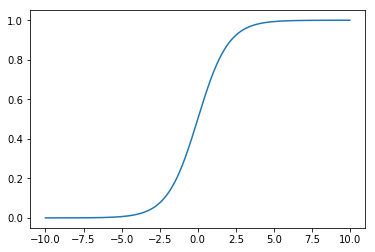

In [4]:
x = np.arange(-10, 10, .02)
fig, ax = plt.subplots()
ax.plot(x, sigmoid(x))
plt.show()

可见 sigmoid 的值域是 (0,1)。因此当我们给出一个输入 $x$ 后，最终逻辑回归会给出一个介于 0 和 1 之间的标量值，可以将这个结果值看成属于正类的概率，以此实现了二分类。

至此就完成了逻辑回归的模型构建，核心思想就是通过一个 sigmoid 函数将线性回归的输出映射到 (0,1)，实现二分类的目标。

## Cost Function
如同线性回归，我们也需要构建一个 cost 函数来优化模型中的参数。为此我们需要先挑选一个合适的 loss 函数，来计算每一个样本标签的预测值和真实值之间的差异。对于逻辑回归，使用交叉熵损失函数（cross-entropy loss）。

$$L(a,y)=-ylog(a)-(1-y)log(1-a)\tag{3}$$

上式中，$a$ 是预测值，$y$ 是真实值.

在实际训练时，我们的训练集中会包含多个样本。假设训练集中共有 m 个样本，为此，我们需要构建一个定义在整个训练集上的 cost 函数。这里我们简单的将 cost 函数定义成训练集中各个样本的 loss 函数均值：

$$J=\frac{1}{m}\sum^m_{i=1}L(a^{(i)},y^{(i)})\tag{4}$$

> 关于 cost 函数和 loss 函数，可以进一步参考[这里](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing)

## Backward Propagation
通过后向传播算法计算 cost 函数对参数 $w$ 和 $b$ 的梯度。

所要求的 cost 函数为：

$$
\begin{split}
J&=\frac{1}{m}\sum^m_{i=1}L(a^{(i)},y^{(i)}) \\
&=-\frac{1}{m}\sum^m_{i=1}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})
\end{split}\tag{5}
$$

由链式规则（chain rule）：
$$\frac{\partial J}{\partial w}=\frac{\partial J}{\partial a}\frac{\partial a}{\partial z}\frac{\partial z}{\partial w}$$

其中 $\frac{\partial a}{\partial z}$ 是在计算 sigmoid 函数的导数，对于 sigmoid 函数，虽然其公式较为复杂，求导过程也较为复杂，但是最终的导数形式很简洁：

$$\sigma(x)=\frac{1}{1+e^{-x}}$$
$$\frac{\partial\sigma(x)}{\partial x}=\sigma(x)(1-\sigma(x))$$

类似的，还有一个 tanh 函数：
$$\tanh(x)= \frac{e^x-e^{-x}}{e^x+e^{-x}}$$
$$\frac{\partial\tanh(x)}{\partial x}=1-(\tanh(x))^2$$



对 $\mathbf{w}$ 的偏导则为：

$$
\begin{split}
\frac{\partial J}{\partial \mathbf{w}}&=\frac{\partial J}{\partial a}\frac{\partial a}{\partial z}\frac{\partial z}{\partial \mathbf{w}} \\
&=-\frac{1}{m}\sum^m_{i=1}[\frac{y^{(i)}}{a^{(i)}}-\frac{1-y^{(i)}}{1-a^{(i)}}][a^{(i)}(1-a^{(i)})][\mathbf{x}^{(i)}]\\
&=-\frac{1}{m}\sum^m_{i=1}(y^{(i)}-a^{(i)})\mathbf{x}^{(i)}
\end{split}\tag{6}
$$

对 $b$ 的偏导则为：

$$
\begin{split}
\frac{\partial J}{\partial b}&=\frac{\partial J}{\partial a}\frac{\partial a}{\partial z}\frac{\partial z}{\partial b} \\
&=-\frac{1}{m}\sum^m_{i=1}[\frac{y^{(i)}}{a^{(i)}}-\frac{1-y^{(i)}}{1-a^{(i)}}][a^{(i)}(1-a^{(i)})]\\
&=-\frac{1}{m}\sum^m_{i=1}(y^{(i)}-a^{(i)})
\end{split}\tag{7}
$$

这里值得注意的是，因为 $\mathbf{w}$ 是一个向量，所以其导数也需要是一个同维度的向量；$b$ 是一个标量，所以其导数也要是一个标量。上述公式中，所有加粗小写字母代表向量，不加粗小写字母代表标量。

## Optimization
在优化过程中，需要的步骤有：

1. 初始化参数：将权重参数（$\mathbf{w}$）初始化为 0 附近的较小的随机数，将偏置项（b）设成 0。
2. Loop:
    - 计算 cost 函数 (forward propagation)
    - 计算梯度 (backward propagation)
    - 使用梯度下降法更新参数：$\theta=\theta-\alpha d\theta$

## 矩阵运算
前一部分所有的运算都是基于向量和标量的，实际上，我们可以将其变成矩阵的运算。在这里，为了简便，所有向量都默认为列向量。

我们可以将 m 样本的 n 维输入d的列向量 $\mathbf{x^{(i)}}\in R^n$ 压进一个矩阵 $X \in R^{n\times m}$中，矩阵中每一列代表一个输入样本：
$$X=[\mathbf{x^{(1)}},\mathbf{x^{(2)}},\dots,\mathbf{x^{(m)}}]$$

则如下公式
$$z=\mathbf{w}^T\mathbf{x}+b\tag{1}$$

会变为：

$$\mathbf{z}^T=\mathbf{w}^TX+b\tag{8}$$

注意变量 z 也由标量变成了 $m\times 1$ 的向量，而 $b$ 在这里没有发生变化，是因为 python 中的 broadcast 机制。简单地说，就是 python 会贴心地帮你把标量 $b$ 加到由 $\mathbf{w}^TX$ 得到的向量中的每一个元素上 。

cost 函数的公式也变成了如下形式：
$$\mathbf{a}=\hat{\mathbf{y}}=\sigma(\mathbf{z})\tag{9}$$
$$J=-\frac{1}{m}[\mathbf{y}^Tlog(\mathbf{a})+(1-\mathbf{y})^Tlog(1-\mathbf{a})]\tag{10}$$

矩阵形式下对 $\mathbf{w}$ 的偏导则为：

$$
\begin{split}
\frac{\partial J}{\partial \mathbf{w}}&=-\frac{1}{m}\sum^m_{i=1}(y^{(i)}-a^{(i)})\mathbf{x}^{(i)}\\
&=-\frac{1}{m}X(\mathbf{y}-\mathbf{a})
\end{split}\tag{10}
$$

因为 $X$ 是 $n\times m$ 的，而 $A$ 和 $Y$ 是 $m\times 1$ 的，所以 $X$ 要在左侧。

对 $b$ 的偏导则为：

$$
\begin{split}
\frac{\partial J}{\partial b}&=-\frac{1}{m}\sum^m_{i=1}(y^{(i)}-a^{(i)})\\
&=-\frac{1}{m}(\mathbf{y}-\mathbf{a})\mathbf{i}
\end{split}
$$


## 小结
用矩阵形式表示，逻辑回归的公式如下：

$$\mathbf{z}^T=\mathbf{w}^TX+b$$
$$\mathbf{a}=\hat{\mathbf{y}}=\sigma(\mathbf{z})$$

cost 函数为：

$$J=-\frac{1}{m}[\mathbf{y}^Tlog(\mathbf{a})+(1-\mathbf{y})^Tlog(1-\mathbf{a})]$$

梯度为：
$$
\frac{\partial J}{\partial \mathbf{w}}=-\frac{1}{m}X(\mathbf{y}-\mathbf{a})
$$

$$
\frac{\partial J}{\partial b}=-\frac{1}{m}(\mathbf{y}-\mathbf{a})\mathbf{i}
$$

## Python 实现

In [5]:
def initialize_para(dim):
    w=np.random.rand(dim,1)
    b=0
    return w,b
    
def propagate(w,b,X,y):
    
    # forward propagation
    m = X.shape[1]
    z=(w.T.dot(X)+b).T
    a=sigmoid(z)
    J=(-1/m)*(y.T.dot(np.log(a))+(1-y).T.dot(np.log(1-a)))
    
    # backward propagation
    dw=(-1/m)*(X.dot(y-a))
    db=(-1/m)*(np.sum(y-a))
    
    grads = {"dw": dw,
             "db": db}
    return J,grads

In [6]:
def optimize(w, b, X, Y, num_iterations, learning_rate,print_cost=True):
    costs=[]
    for i in range(num_iterations):
        
        cost,grads=propagate(w, b, X, Y)
        
        w-=learning_rate*grads['dw']
        b-=learning_rate*grads['db']
        
        costs.append(cost)
        
        if print_cost and i%(num_iterations/10)==0:
            print('itertion {0:d}， cost: {1}'.format(i,cost))
    params={'w':w,'b':b}
    return params,costs

In [7]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.title('data distribution with decision boundary')
    plt.show()
def forward_propagation(X,params):
    w=params['w']
    b=params['b']
    # forward propagation
    m = X.shape[1]
    z=(w.T.dot(X)+b).T
    a=sigmoid(z)
    return a
def predict_dec(parameters, X):
    # Predict using forward propagation and a classification threshold of 0.5
    a = forward_propagation(X, parameters)
    predictions = (a > 0.5)
    return predictions

In [8]:
def LR_with_plot_boundary(a=2,b=-1,x_dim=2,sample_num=500,plot_graph=True,
                          plot_boundary=True,print_cost=True,add_noise=None):
    '''
    用逻辑回归拟合分类器 y=ax+b
    :param a: y=ax+b 的系数 a
    :param b: y=ax+b 的系数 b
    :param x_dim: 数据维度 
    :param sample_num: 数据点的数量
    :param plot_graph: 是否需要画出数据分布
    :param plot_boundary: 是否需要画出分类边界
    :param print_cost: 是否输出 LR 迭代过程中的 cost 函数数值
    :param add_error: 加入噪声点的数量，None为不添加噪声点
    :return: 
    '''
    # 参数
    x_dim=2 # 二维坐标
    sample_num=500 # 生成的数据点个数

    # 生成数据

    data=10*np.random.rand(sample_num,x_dim).T
    x=np.arange(0, 10, 0.01)
    y=a*x+b
    
    # 构建标签
    label=np.array([1 if data[1][i] >  a*data[0][i]+b else 0 for i in range(len(data[1]))])
    label=label.reshape(len(label),-1)
    
    # 是否加入误差
    if add_noise:
        error=list(range(len(label)))
        np.random.shuffle(error)
        error=error[:add_noise]
        label[error]=1-label[error]
        
    if x_dim==2 and plot_graph:
        # 数据分布
        plt.scatter(data[0, :], data[1, :], c=label.reshape(len(label)), cmap=plt.cm.Spectral)
        plt.title('data distribution')
        plt.show()
        
    # logistic regression
    w, b_logit=initialize_para(x_dim)
    params,costs=optimize(w, b_logit, data, label, 10000, 0.01,print_cost=print_cost)
        
    if x_dim==2 and plot_boundary:
        # 画出分类面
        plot_decision_boundary(lambda x: predict_dec(params, x), data, label)

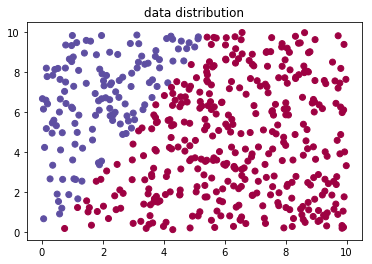

itertion 0， cost: [[ 3.07224538]]
itertion 1000， cost: [[ 0.10461085]]
itertion 2000， cost: [[ 0.08386502]]
itertion 3000， cost: [[ 0.073487]]
itertion 4000， cost: [[ 0.06681965]]
itertion 5000， cost: [[ 0.06200755]]
itertion 6000， cost: [[ 0.05829089]]
itertion 7000， cost: [[ 0.05528999]]
itertion 8000， cost: [[ 0.05278993]]
itertion 9000， cost: [[ 0.05065814]]


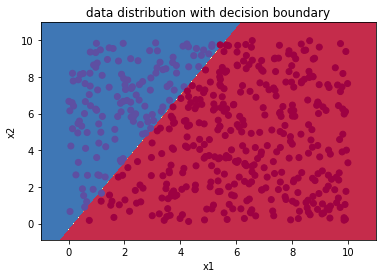

In [9]:
LR_with_plot_boundary()

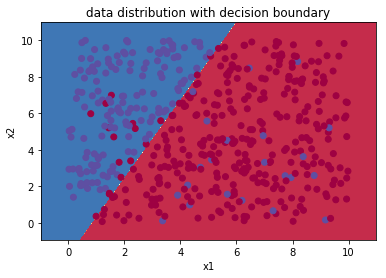

In [10]:
LR_with_plot_boundary(add_noise=30,plot_graph=False,print_cost=False)

可见 LR 数据对噪声数据“宽容度”很大。但也反映了如果不加改进，其无法处理“曲线”分类面或多分类的问题。

# CMU
## 构建条件概率

对于二元输出，我们有连续或非连续的输入，如何建模并分析这些数据呢？

对于这个分类任务，我么希望给定输入变量 $X$，获得一个 $Y$ 的条件分布 $Pr(Y|X)$。这会告诉我们预测得有多准确。
如果我们挑选一类命名为"1"，另一类为"0"，那么 $Y$ 就成了一个指示变量 (indicator variable)，那么就可以认为 $Pr(Y=1)=E[Y]$。

> 这里是因为$E[Y]=1*Pr(Y=1)+0*Pr(Y=0)$

类似地，$Pr(Y =1|X =x) = E[Y|X =x]$。（所以，条件概率可以看成指示变量（indicator）的条件期望）

解决这一问题的最直接的方法是选取一个 [smoother](https://en.wikipedia.org/wiki/Kernel_smoother)，并为指示变量（$Y$）计算一个回归函数，这一回归函数可以作为对条件概率函数的估计。但是这一思路会有以下两个挑战：

1. 概率必须是介 0-1 之间的，
2. 


如果我们用以 $\theta$ 为参数的函数 $p$ 来计算 x 是"1"这一类的预测概率，即 $Pr(Y = 1|X = x) = p(x;\theta)$。如果假设所有的观测值之间是相互独立的话，那么条件似然函数可以写成:

$$\prod_{i=1}^nPr(Y=y_i|X=x_i)=\prod_{i=1}^np(x_i;\theta)^{y_i}(1-p(x_i;\theta)^{1-y_i})$$

伯努利实验的序列 $y_1,\dots,y_n$，成功的概率为常数 $p$，那么似然函数为：

$$\prod_{i=1}^np^{y_i}(1-p)^{1-y_i}$$

当在 $p=\hat{p}=n^{-1}\sum_{i=1}^ny_i$ 时,似然函数达到最大。如果不同样本拥有不同成功概率 $p_i$，那么似然函数变成了：

$$\prod_{i=1}^np^{y_i}_i(1-p)^{1-y_i}_i$$